# Import and Assess the dataset

In [ ]:
!pip install pyLDAvis==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 47.4 MB/s eta 0:00:00


In [ ]:
# Loading primary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import re
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models

In [ ]:
#Dataset
df = pd.read_csv('Secondary_Dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46495 entries, 0 to 46494
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  46495 non-null  object
 1   Tweet Id  46495 non-null  int64 
 2   Text      46495 non-null  object
 3   Username  46495 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Tweet Id,Text,Username
0,2022-01-30 22:41:15,1487918860393402371,a late breakfast! \n\n#simple #easy #health #i...,A1N10M_Logging
1,2022-01-30 22:37:20,1487917876778520576,CHICKEN LETTUCE WRAPS #shorts #ytshorts #healt...,nazmulmarketer1
2,2022-01-30 20:22:10,1487883861564477441,#health #humor #food https://t.co/vtfVV1aySD,vanillaspice82
3,2022-01-30 20:01:00,1487878532625625089,"Zone Diet Balanced Meal (40% carb, 30% , 30% p...",ZHealthyEating
4,2022-01-30 19:15:19,1487867035732393984,Experts say these are the top types of #food y...,personalfitnes3


# Peliminary Analysis

In [ ]:
df = df[['Datetime','Text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Text
0,2022-01-30 22:41:15,a late breakfast! \n\n#simple #easy #health #i...
1,2022-01-30 22:37:20,CHICKEN LETTUCE WRAPS #shorts #ytshorts #healt...
2,2022-01-30 20:22:10,#health #humor #food https://t.co/vtfVV1aySD
3,2022-01-30 20:01:00,"Zone Diet Balanced Meal (40% carb, 30% , 30% p..."
4,2022-01-30 19:15:19,Experts say these are the top types of #food y...


In [ ]:
def word_counter(document):
  split_word = str(document).split(" ") # split by white space
  word_count = len(split_word) # count the words
  return word_count

df['word_count'] = df['Text'].apply(word_counter)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Text,word_count
0,2022-01-30 22:41:15,a late breakfast! \n\n#simple #easy #health #i...,13
1,2022-01-30 22:37:20,CHICKEN LETTUCE WRAPS #shorts #ytshorts #healt...,9
2,2022-01-30 20:22:10,#health #humor #food https://t.co/vtfVV1aySD,4
3,2022-01-30 20:01:00,"Zone Diet Balanced Meal (40% carb, 30% , 30% p...",24
4,2022-01-30 19:15:19,Experts say these are the top types of #food y...,27


In [ ]:
df['char_count'] = df['Text'].str.len()  # Includes the spaces
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Text,word_count,char_count
0,2022-01-30 22:41:15,a late breakfast! \n\n#simple #easy #health #i...,13,106
1,2022-01-30 22:37:20,CHICKEN LETTUCE WRAPS #shorts #ytshorts #healt...,9,93
2,2022-01-30 20:22:10,#health #humor #food https://t.co/vtfVV1aySD,4,44
3,2022-01-30 20:01:00,"Zone Diet Balanced Meal (40% carb, 30% , 30% p...",24,178
4,2022-01-30 19:15:19,Experts say these are the top types of #food y...,27,168


In [ ]:
def avg_word(Text):
  words = Text.split() # split the sentence into words
  avg_of_words = (sum(len(word) for word in words)/len(words))
  return avg_of_words

df['avg_word'] = df['Text'].apply(avg_word)
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Text,word_count,char_count,avg_word
0,2022-01-30 22:41:15,a late breakfast! \n\n#simple #easy #health #i...,13,106,7.076923
1,2022-01-30 22:37:20,CHICKEN LETTUCE WRAPS #shorts #ytshorts #healt...,9,93,8.400000
2,2022-01-30 20:22:10,#health #humor #food https://t.co/vtfVV1aySD,4,44,10.250000
3,2022-01-30 20:01:00,"Zone Diet Balanced Meal (40% carb, 30% , 30% p...",24,178,5.807692
4,2022-01-30 19:15:19,Experts say these are the top types of #food y...,27,168,5.035714


# Text pre-processing

In [ ]:
import re

url_pattern = re.compile(r'https?://\S+')

# remove URLs from text
df['Text'] = df['Text'].apply(lambda x: url_pattern.sub('', x))

print(df)

                  Datetime                                               Text  \
0      2022-01-30 22:41:15  a late breakfast! \n\n#simple #easy #health #i...   
1      2022-01-30 22:37:20  CHICKEN LETTUCE WRAPS #shorts #ytshorts #healt...   
2      2022-01-30 20:22:10                              #health #humor #food    
3      2022-01-30 20:01:00  Zone Diet Balanced Meal (40% carb, 30% , 30% p...   
4      2022-01-30 19:15:19  Experts say these are the top types of #food y...   
...                    ...                                                ...   
46490  2020-10-31 08:53:05  seven layer salad recipe is also good for our ...   
46491  2020-10-31 08:41:29  Would You Like to Know Exactly What to Eat to ...   
46492  2020-10-31 08:36:51  You do not have to give up your Favourite Brea...   
46493  2020-10-31 08:32:26  28 - Day keto challenge! Get our 28 - Day Meal...   
46494  2020-10-31 08:30:00  Aloe vera gel is a blessing for skin care\n\n#...   

       word_count  char_cou

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Text'] = df['Text'].str.lower()
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Text,word_count,char_count,avg_word
0,2022-01-30 22:41:15,a late breakfast! \n\n#simple #easy #health #i...,13,106,7.076923
1,2022-01-30 22:37:20,chicken lettuce wraps #shorts #ytshorts #healt...,9,93,8.400000
2,2022-01-30 20:22:10,#health #humor #food,4,44,10.250000
3,2022-01-30 20:01:00,"zone diet balanced meal (40% carb, 30% , 30% p...",24,178,5.807692
4,2022-01-30 19:15:19,experts say these are the top types of #food y...,27,168,5.035714


In [ ]:
# This regular expression only keeps words and characters
df['Text'] = df['Text'].str.replace('[^\w\s]','')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence '\w'
<>:2: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-14-a6b71bb4640a>:2: DeprecationWarning: invalid escape sequence '\w'
  df['Text'] = df['Text'].str.replace('[^\w\s]','')
<ipython-input-14-a6b71bb4640a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]','')


,Datetime,Text,word_count,char_count,avg_word
0,2022-01-30 22:41:15,a late breakfast \n\nsimple easy health inputs...,13,106,7.076923
1,2022-01-30 22:37:20,chicken lettuce wraps shorts ytshorts health l...,9,93,8.400000
2,2022-01-30 20:22:10,health humor food,4,44,10.250000
3,2022-01-30 20:01:00,zone diet balanced meal 40 carb 30 30 protein...,24,178,5.807692
4,2022-01-30 19:15:19,experts say these are the top types of food yo...,27,168,5.035714


In [ ]:
def remove_digits(sent):
  return " ".join(w for w in sent.split() if not w.isdigit())

df['Text'] = df['Text'].apply(remove_digits)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Text,word_count,char_count,avg_word
0,2022-01-30 22:41:15,a late breakfast simple easy health inputs sun...,13,106,7.076923
1,2022-01-30 22:37:20,chicken lettuce wraps shorts ytshorts health l...,9,93,8.400000
2,2022-01-30 20:22:10,health humor food,4,44,10.250000
3,2022-01-30 20:01:00,zone diet balanced meal carb protein blocks ko...,24,178,5.807692
4,2022-01-30 19:15:19,experts say these are the top types of food yo...,27,168,5.035714


In [ ]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

# Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwordlist))
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Text,word_count,char_count,avg_word
0,2022-01-30 22:41:15,late breakfast simple easy health inputs sunda...,13,106,7.076923
1,2022-01-30 22:37:20,chicken lettuce wraps shorts ytshorts health l...,9,93,8.400000
2,2022-01-30 20:22:10,health humor food,4,44,10.250000
3,2022-01-30 20:01:00,zone diet balanced meal carb protein blocks ko...,24,178,5.807692
4,2022-01-30 19:15:19,experts say top types food eating improve brai...,27,168,5.035714


In [ ]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in emojis))
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Text,word_count,char_count,avg_word
0,2022-01-30 22:41:15,late breakfast simple easy health inputs sunda...,13,106,7.076923
1,2022-01-30 22:37:20,chicken lettuce wraps shorts ytshorts health l...,9,93,8.400000
2,2022-01-30 20:22:10,health humor food,4,44,10.250000
3,2022-01-30 20:01:00,zone diet balanced meal carb protein blocks ko...,24,178,5.807692
4,2022-01-30 19:15:19,experts say top types food eating improve brai...,27,168,5.035714


# Common and rare word analysis

In [ ]:
word_frequency = pd.Series(' '.join(df['Text']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Top common words
word_frequency[:10]  # get top 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


food         53329
health       50721
diet         13896
healthy      13821
nutrition    13281
fitness      10207
lifestyle     8560
life          6851
love          6215
wellness      5833
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


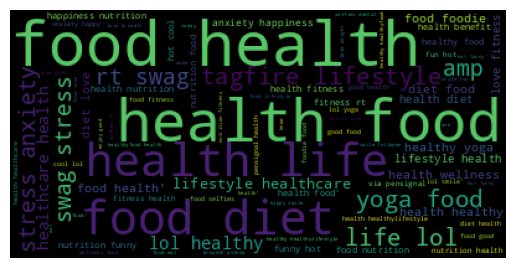

In [ ]:
from PIL import Image
from wordcloud import WordCloud

corpus = list(df['Text'])

wordcloud = WordCloud(background_color='black', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# least common words
word_frequency[-10:]  # get top 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


chocosandricekheer    1
1minuterecipe         1
sunandakaushik        1
pedia_facts           1
worldemojiday         1
qrg                   1
emojis                1
riddle                1
pakistanfew           1
saladrecipes          1
dtype: int64

Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:

from nltk.stem import WordNetLemmatizer

lemmtizer = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def lemmatize_function(sent):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word) for word in word_list]
  lemma_Text = " ".join(lemma_word_list)
  return lemma_Text

df['Text_lemmatized'] = df['Text'].apply(lemmatize_function)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df[['Text','Text_lemmatized']].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Text,Text_lemmatized
0,late breakfast simple easy health inputs sunda...,late breakfast simple easy health input sunday...
1,chicken lettuce wraps shorts ytshorts health l...,chicken lettuce wrap short ytshorts health lun...
2,health humor food,health humor food
3,zone diet balanced meal carb protein blocks ko...,zone diet balanced meal carb protein block kod...
4,experts say top types food eating improve brai...,expert say top type food eating improve brain ...
5,winter hard time bodies fuel healthy foods sup...,winter hard time body fuel healthy food suppor...
6,new garden progress next season already lookin...,new garden progress next season already lookin...
7,vitamind vitamins vitamin food diet dietplan m...,vitamind vitamin vitamin food diet dietplan me...
8,think animalcruelty pigs involves outside anim...,think animalcruelty pig involves outside anima...
9,keep saying food shelves empty good thing not ...,keep saying food shelf empty good thing not fo...


# Bigrams, Trigrams



### Bigrams

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):

    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0)

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bigrams = get_ngrams(df['Text'].tolist(), ngram_range=(2, 2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bigrams_df = pd.DataFrame(bigrams)
bigrams_df.columns=["Bi-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


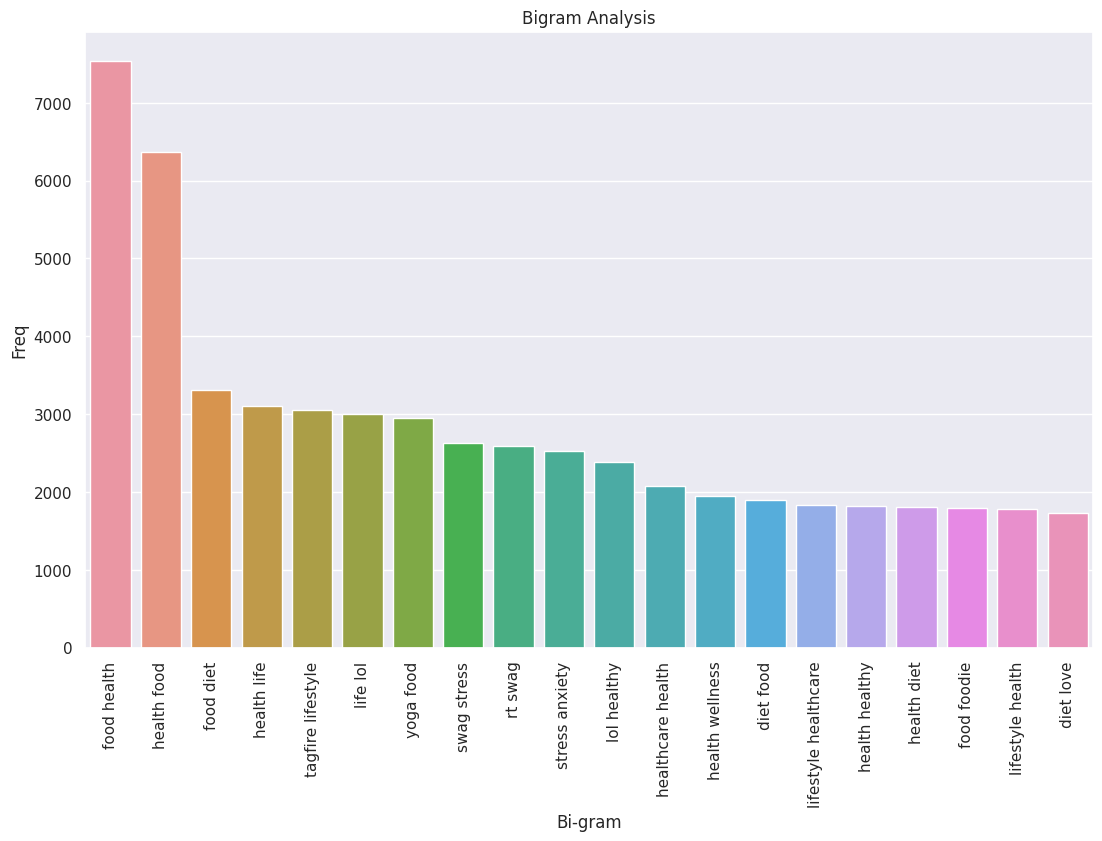

In [ ]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_df[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Bigram Analysis')
plt.show()

### Trigrams

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(3, 3)):

    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0)

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trigrams = get_ngrams(df['Text'].tolist(), ngram_range=(3, 3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trigrams_df = pd.DataFrame(trigrams)
trigrams_df.columns=["Tri-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


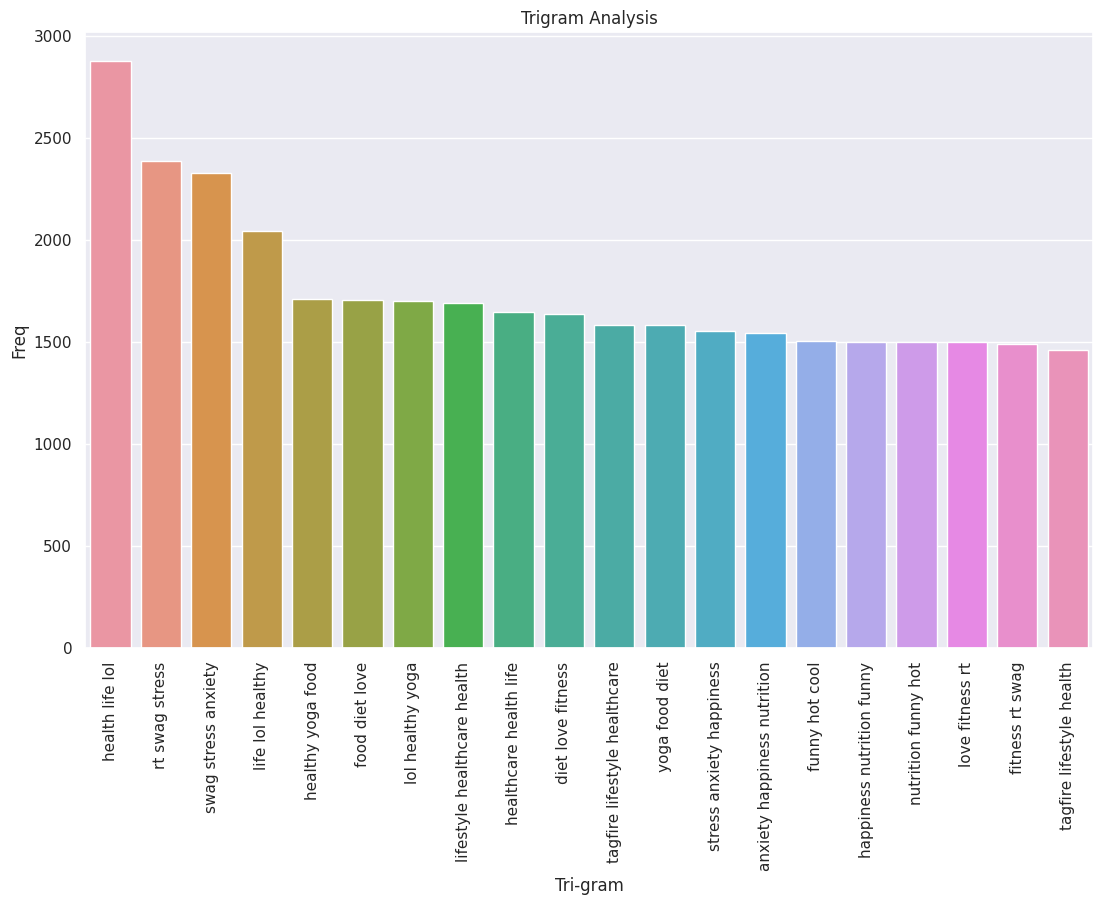

In [ ]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_df[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Trigram Analysis')
plt.show()

# Bags of words

In [ ]:
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1), analyzer = "word")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_bow = bow.fit_transform(df['Text_lemmatized'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Text_lemmatized'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    late breakfast simple easy health input sunday...
1    chicken lettuce wrap short ytshorts health lun...
2                                    health humor food
3    zone diet balanced meal carb protein block kod...
4    expert say top type food eating improve brain ...
Name: Text_lemmatized, dtype: object

In [ ]:
print(X_bow)

  (0, 96)	1
  (0, 806)	1
  (0, 251)	1
  (0, 406)	1
  (0, 855)	1
  (0, 372)	1
  (0, 326)	1
  (0, 599)	1
  (1, 406)	1
  (1, 326)	1
  (1, 140)	1
  (1, 516)	1
  (1, 547)	1
  (1, 180)	1
  (2, 406)	1
  (2, 326)	1
  (3, 96)	1
  (3, 406)	1
  (3, 372)	1
  (3, 326)	1
  (3, 222)	1
  (3, 55)	1
  (3, 564)	1
  (3, 121)	1
  (3, 722)	1
  :	:
  (46493, 130)	1
  (46493, 470)	1
  (46493, 494)	1
  (46494, 406)	1
  (46494, 326)	1
  (46494, 222)	1
  (46494, 421)	1
  (46494, 415)	1
  (46494, 423)	1
  (46494, 424)	1
  (46494, 604)	1
  (46494, 328)	1
  (46494, 807)	1
  (46494, 966)	1
  (46494, 493)	1
  (46494, 317)	1
  (46494, 608)	1
  (46494, 491)	1
  (46494, 492)	1
  (46494, 395)	1
  (46494, 124)	1
  (46494, 87)	1
  (46494, 915)	1
  (46494, 319)	1
  (46494, 316)	1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Term Frequency - Inverse Document Frequecy (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tf_idf = vectorizer.fit_transform(df['Text_lemmatized'])  # as the text data, we will use lemmatized sentences

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(vectorizer.get_feature_names_out())

['000steps' '0023btc' '0035btc' ... '𝙩𝙤' '𝙮𝙤𝙜𝙪𝙧𝙩' '𝙮𝙤𝙪𝙧']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(tf_idf[:5])

  (0, 32915)	0.2982203691364399
  (0, 18278)	0.05035034015086471
  (0, 20990)	0.1996327428976716
  (0, 51943)	0.4010056968180377
  (0, 47127)	0.333480546121126
  (0, 25741)	0.47424870793196905
  (0, 22550)	0.050338429661918226
  (0, 14837)	0.25671889076159454
  (0, 44764)	0.28789772688279053
  (0, 6904)	0.24417273751501012
  (0, 28743)	0.4010056968180377
  (1, 10867)	0.21622105909522238
  (1, 30218)	0.29587053194786306
  (1, 54506)	0.5947442226109539
  (1, 44518)	0.389337346296114
  (1, 53993)	0.39428829936283594
  (1, 29163)	0.3472389284537171
  (1, 9041)	0.28026225581593384
  (1, 18278)	0.053949655858400565
  (1, 22550)	0.053936893943032305
  (2, 24409)	0.9819095339058302
  (2, 18278)	0.13390696302944619
  (2, 22550)	0.13387528702888213
  (3, 23024)	0.11834379717962167
  (3, 41093)	0.14171563056017156
  :	:
  (3, 6186)	0.284328756600495
  (3, 39850)	0.16359214579267667
  (3, 7996)	0.2559073277283865
  (3, 31399)	0.17218660580950818
  (3, 4550)	0.2530974794026088
  (3, 13224)	0.084936

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Temporal Analysis | Date

In [ ]:
from datetime import datetime

# Split date and time into separate columns
df['Date'] = df['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())
df['Time'] = df['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time())

# Drop original Date-Time column
df = df.drop(columns=['Datetime'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_temp = df[['Date','Text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Group the twitter datasets based on the date field and get the count per each day.
df_temp = df_temp.groupby(['Date'])['Text'].count().reset_index(name='tweet_count').set_index('Date')

print(df_temp)

            tweet_count
Date                   
2020-10-31          110
2020-11-01          152
2020-11-02          190
2020-11-03          170
2020-11-04          205
...                 ...
2022-01-26           77
2022-01-27           70
2022-01-28           80
2022-01-29           56
2022-01-30           51

[457 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles


Text(0.5, 1.0, 'Tweets Count by Date')

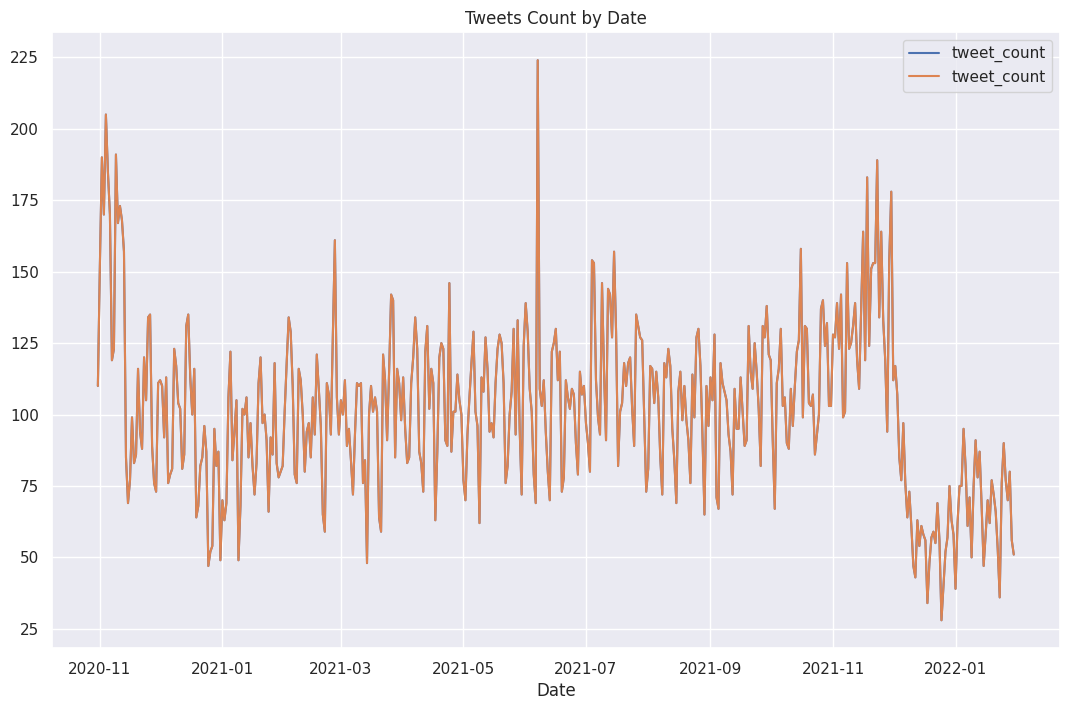

In [ ]:
ax = df_temp.plot()
df_temp.plot(ax=ax)
plt.savefig('temporal_analysis_v2.png', dpi=800)
plt.title('Tweets Count by Date')

# Temporal Analysis | Time

In [ ]:
df_temp = df[['Time','Text']]

print(df_temp)

           Time                                               Text
0      22:41:15  late breakfast simple easy health inputs sunda...
1      22:37:20  chicken lettuce wraps shorts ytshorts health l...
2      20:22:10                                  health humor food
3      20:01:00  zone diet balanced meal carb protein blocks ko...
4      19:15:19  experts say top types food eating improve brai...
...         ...                                                ...
46490  08:53:05  seven layer salad recipe also good digestive s...
46491  08:41:29  would like know exactly eat lose get healthy w...
46492  08:36:51  not give favourite bread sandwiches amp pizza ...
46493  08:32:26  day keto challenge get day meal plan expert gu...
46494  08:30:00  aloe vera gel blessing skin care health health...

[46495 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46495 entries, 0 to 46494
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    46495 non-null  object
 1   Text    46495 non-null  object
dtypes: object(2)
memory usage: 726.6+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-51-ae0ffe575dfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Time'] = pd.to_datetime(df_temp['Time'], format='%H:%M:%S')
<ipython-input-51-ae0ffe575dfe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

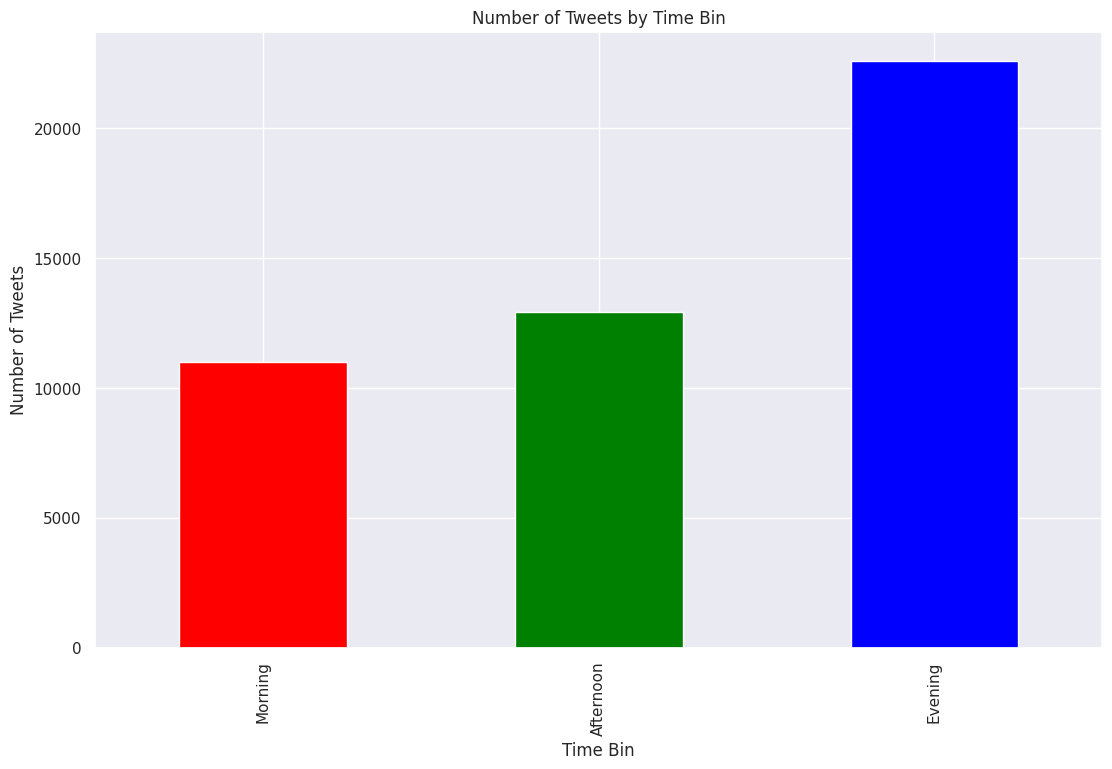

In [ ]:
# Convert time column to datetime format
df_temp['Time'] = pd.to_datetime(df_temp['Time'], format='%H:%M:%S')

# Create new column with time bin
df_temp['Time Bin'] = df_temp['Time'].apply(lambda x: 'Morning' if x.hour >= 8 and x.hour < 13 else ('Afternoon' if x.hour >= 13 and x.hour < 18 else 'Evening'))

# Group tweets by time bin and count number of tweets in each bin
time_bin_counts = df_temp.groupby('Time Bin')['Text'].count()

# Reindex time bin counts in desired order
time_bin_counts = time_bin_counts.reindex(['Morning', 'Afternoon', 'Evening'])

# Plot time bins
time_bin_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.xlabel('Time Bin')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Time Bin')
plt.show()

# Sentiment Analysis

In [ ]:
df['score'] = df['Text_lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df[['Text_lemmatized', 'score']][:40])

                                      Text_lemmatized     score
0   late breakfast simple easy health input sunday...  0.208333
1   chicken lettuce wrap short ytshorts health lun... -0.300000
2                                   health humor food  0.000000
3   zone diet balanced meal carb protein block kod...  0.700000
4   expert say top type food eating improve brain ...  0.500000
5   winter hard time body fuel healthy food suppor...  0.104167
6   new garden progress next season already lookin...  0.145455
7   vitamind vitamin vitamin food diet dietplan me...  0.250000
8   think animalcruelty pig involves outside anima...  0.000000
9   keep saying food shelf empty good thing not fo...  0.300000
10  provide quality healthy food option everyday f...  0.333333
11     food help brain age cool aging wellness health  0.350000
12  thrive raw vegan winter amp yearround diet amp...  0.101282
13  common food eaten healthiest people world food... -0.300000
14  little work done emission inside hom

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['category'] = None

# Convert polarity scores into negative and positive definitions
sentiment = []
for score in df['score']:
    if score < 0:
        sentiment.append("Negative")
    elif score == 0:
        sentiment.append("Neutral")
    else:
        sentiment.append("Positive")
df['sentiment'] = sentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df[['Text_lemmatized','score','sentiment']][:20])

                                      Text_lemmatized     score sentiment
0   late breakfast simple easy health input sunday...  0.208333  Positive
1   chicken lettuce wrap short ytshorts health lun... -0.300000  Negative
2                                   health humor food  0.000000   Neutral
3   zone diet balanced meal carb protein block kod...  0.700000  Positive
4   expert say top type food eating improve brain ...  0.500000  Positive
5   winter hard time body fuel healthy food suppor...  0.104167  Positive
6   new garden progress next season already lookin...  0.145455  Positive
7   vitamind vitamin vitamin food diet dietplan me...  0.250000  Positive
8   think animalcruelty pig involves outside anima...  0.000000   Neutral
9   keep saying food shelf empty good thing not fo...  0.300000  Positive
10  provide quality healthy food option everyday f...  0.333333  Positive
11     food help brain age cool aging wellness health  0.350000  Positive
12  thrive raw vegan winter amp yearro

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


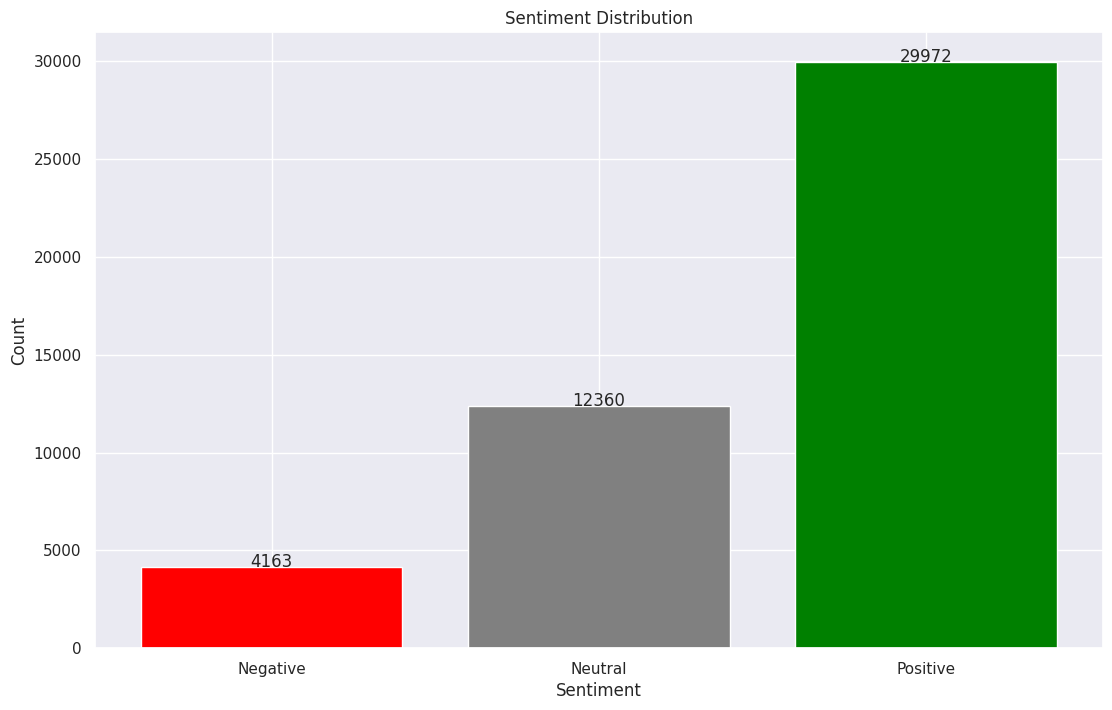

In [ ]:
# Group the data by sentiment and count the number of entries in each group
sentiment_counts = df.groupby(['sentiment']).count()['Text']

# Define colors for each sentiment category
colors = {'Negative': 'red', 'Neutral': 'gray', 'Positive': 'green'}

# Create a bar plot
fig, ax = plt.subplots()
for sentiment, count in sentiment_counts.items():
    ax.bar(sentiment, count, color=colors[sentiment], label=sentiment)
    ax.text(sentiment, count+5, str(count), ha='center')

ax.set_title('Sentiment Distribution')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()

# Topic Modeling


In [ ]:
# Setting up the environment for LDA algorithm.

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the tweets as the text corpus.
corpus = list(df['Text_lemmatized'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['late breakfast simple easy health input sunday vibe good food mood',
 'chicken lettuce wrap short ytshorts health lunch food cooking',
 'health humor food',
 'zone diet balanced meal carb protein block kodiak pancake egg good breakfast zone health food recipe healthyfood',
 'expert say top type food eating improve brain health prevent dementia like share follow']

In [ ]:
# Tokenization
Text = [[word for word in str(document).split()] for document in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Text[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['late',
  'breakfast',
  'simple',
  'easy',
  'health',
  'input',
  'sunday',
  'vibe',
  'good',
  'food',
  'mood'],
 ['chicken',
  'lettuce',
  'wrap',
  'short',
  'ytshorts',
  'health',
  'lunch',
  'food',
  'cooking'],
 ['health', 'humor', 'food'],
 ['zone',
  'diet',
  'balanced',
  'meal',
  'carb',
  'protein',
  'block',
  'kodiak',
  'pancake',
  'egg',
  'good',
  'breakfast',
  'zone',
  'health',
  'food',
  'recipe',
  'healthyfood'],
 ['expert',
  'say',
  'top',
  'type',
  'food',
  'eating',
  'improve',
  'brain',
  'health',
  'prevent',
  'dementia',
  'like',
  'share',
  'follow']]

In [ ]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(Text)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'dict'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


When creating the dictionary, each tweet (document) is alphabetically sorted before composing the dictionary.

In [ ]:
print(Text[0])
print('alphabetically sorted', sorted(Text[0]))

['late', 'breakfast', 'simple', 'easy', 'health', 'input', 'sunday', 'vibe', 'good', 'food', 'mood']
alphabetically sorted ['breakfast', 'easy', 'food', 'good', 'health', 'input', 'late', 'mood', 'simple', 'sunday', 'vibe']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(Text[1])
print('alphabetically sorted', sorted(Text[1]))

['chicken', 'lettuce', 'wrap', 'short', 'ytshorts', 'health', 'lunch', 'food', 'cooking']
alphabetically sorted ['chicken', 'cooking', 'food', 'health', 'lettuce', 'lunch', 'short', 'wrap', 'ytshorts']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the dictionary
print(dictionary.token2id)

{'breakfast': 0, 'easy': 1, 'food': 2, 'good': 3, 'health': 4, 'input': 5, 'late': 6, 'mood': 7, 'simple': 8, 'sunday': 9, 'vibe': 10, 'chicken': 11, 'cooking': 12, 'lettuce': 13, 'lunch': 14, 'short': 15, 'wrap': 16, 'ytshorts': 17, 'humor': 18, 'balanced': 19, 'block': 20, 'carb': 21, 'diet': 22, 'egg': 23, 'healthyfood': 24, 'kodiak': 25, 'meal': 26, 'pancake': 27, 'protein': 28, 'recipe': 29, 'zone': 30, 'brain': 31, 'dementia': 32, 'eating': 33, 'expert': 34, 'follow': 35, 'improve': 36, 'like': 37, 'prevent': 38, 'say': 39, 'share': 40, 'top': 41, 'type': 42, 'body': 43, 'fuel': 44, 'hard': 45, 'healthy': 46, 'immune': 47, 'immunity': 48, 'support': 49, 'system': 50, 'time': 51, 'winter': 52, 'already': 53, 'chef': 54, 'exciting': 55, 'garden': 56, 'lescargotbleu': 57, 'looking': 58, 'new': 59, 'next': 60, 'nodig': 61, 'progress': 62, 'season': 63, 'sustainable': 64, 'checked': 65, 'dietplan': 66, 'got': 67, 'healthtips': 68, 'mealprep': 69, 'nutrition': 70, 'people': 71, 'status

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in Text]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tweet_id = 0
print(Text[tweet_id]) # each tweet converted to tokens
print(dictionary.doc2bow(Text[tweet_id])) # each token is represented as a id from a dictionary

['late', 'breakfast', 'simple', 'easy', 'health', 'input', 'sunday', 'vibe', 'good', 'food', 'mood']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Generate the topic model

Recall we initially loaded models library from gensim.  
(from gensim import corpora, models, similarities)

In [ ]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We need to define how many topics we capture through LDA.

In [ ]:
total_topics = 40

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Below code will build the LDA topic model.   
We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.



In [ ]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The above LDA model is built with 10 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.  
You can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics() as shown next.





In [ ]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.077*"food" + 0.068*"weightlossjourney" + 0.066*"health" + 0.043*"nature" + 0.035*"sustainability" + 0.026*"sustainable"'),
 (1,
  '0.112*"food" + 0.089*"health" + 0.031*"market" + 0.029*"breakfast" + 0.029*"foodie" + 0.025*"video"'),
 (2,
  '0.068*"food" + 0.058*"health" + 0.044*"vegetable" + 0.028*"taste" + 0.027*"tea" + 0.026*"breakfast"'),
 (3,
  '0.107*"fruit" + 0.040*"avocado" + 0.031*"apple" + 0.029*"benefit" + 0.027*"health" + 0.027*"banana"'),
 (4,
  '0.094*"food" + 0.089*"healthy" + 0.085*"healthyfood" + 0.083*"healthylifestyle" + 0.083*"health" + 0.059*"healthyliving"'),
 (5,
  '0.114*"muscle" + 0.078*"food" + 0.068*"health" + 0.047*"learn" + 0.034*"brain" + 0.030*"foodindustry"'),
 (6,
  '0.041*"food" + 0.038*"risk" + 0.037*"study" + 0.036*"christmas" + 0.035*"education" + 0.033*"health"'),
 (7,
  '0.103*"follow" + 0.046*"black" + 0.036*"rice" + 0.035*"bean" + 0.034*"expert" + 0.033*"loseweight"'),
 (8,
  '0.087*"food" + 0.080*"health" + 0.028*"covid" + 0.024*"huma

How will you interpret this?  
Assume a topic is a represented as '0.020*"nbn" + 0.010*"thanks" + 0.009*"turnbullmalcolm" + 0.009*"mobile" + 0.009*"copper" + 0.008*"buy"'  
  
It means the top 6 keywords that contribute to this topic are: nbn, thanks, turnbullmalcolm, mobile, copper, buy and the weight of ‘nbn’ on topic 5 is 0.020.  
  
The weights reflect how important a keyword is to that topic.  

Looking at these keywords, can you guess what this topic could be? You may summarise it as nbn connectivity (or more specifically Turnbull's decision as Telecommunications Minister to continue using the copper network for the NBN).  

Likewise, can you go through the remaining keyword subsets and infer each topic?  







### Interactive topic analyzer

In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      1.398535 -0.214544       1        1  9.403350
7      0.278310 -0.174902       2        1  8.613164
24     1.639630  0.339749       3        1  5.909374
19     1.673907 -0.536704       4        1  4.274541
4      2.245023  0.335190       5        1  4.123757
31     1.571760  0.740459       6        1  4.122029
16     0.360091 -0.217912       7        1  3.215033
10     1.687413 -0.342468       8        1  3.187356
28     2.183963 -0.251165       9        1  2.733152
5      2.181125 -0.561434      10        1  2.675844
27     2.104830  0.320784      11        1  2.443022
37     2.007317 -0.294009      12        1  2.419114
30     2.688478  0.094820      13        1  2.383555
9      0.129737 -0.202733      14        1  2.370888
11     2.310825 -1.349833      15        1  2.309071
0      1.602869 -0.922344      16        1  2.108245
33     2.163650 -0.155147      17        1  2.030996
36     2.423596  0.467058      18        1  1.982580
1      1.656252 -0.293183      19        1  1.819194
25     1.728125 -0.576871      20        1  1.518736
20     1.246185  0.042929      21        1  1.518719
26     1.313944 -0.549951      22        1  1.518583
34     1.973495 -0.154865      23        1  1.518583
23     1.814557 -0.263215      24        1  1.517712
14     1.162922 -1.009696      25        1  1.517712
21     1.387263 -1.001803      26        1  1.517712
32     2.523870 -0.544870      27        1  1.517712
38     1.980853 -1.272240      28        1  1.517712
3      0.216605 -0.206215      29        1  1.517712
6      0.951616 -1.255733      30        1  1.517712
35     2.146467  0.784986      31        1  1.517712
8      1.534557 -0.709837      32        1  1.517712
13     2.062472  1.198516      33        1  1.517712
12     2.683035 -0.350504      34        1  1.517712
22     2.516198  0.225202      35        1  1.517712
29     0.971040  0.268291      36        1  1.517712
15     1.301238 -0.024867      37        1  1.517712
17     1.670203 -1.088024      38        1  1.517712
18     1.276463  1.299067      39        1  1.517712
39     1.771138 -1.761761      40        1  1.517712, topic_info=       Term         Freq        Total Category  logprob  loglift
35   follow   333.000000   333.000000  Default  30.0000  30.0000
2      food  2443.000000  2443.000000  Default  29.0000  29.0000
22     diet   474.000000   474.000000  Default  28.0000  28.0000
351   fruit   172.000000   172.000000  Default  27.0000  27.0000
4    health  2196.000000  2196.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
4    health    12.437404  2196.096849  Topic40  -3.8149  -0.9858
2      food    12.120333  2443.333657  Topic40  -3.8407  -1.1183
296      no     5.255057    29.664584  Topic40  -4.6764   2.4572
811     but     5.558363    55.512710  Topic40  -4.6203   1.8867
201     eat     5.768991   246.914917  Topic40  -4.5831   0.4314

[2024 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
517      16  1.043488      1st
807      13  0.920908      30g
4365     36  1.034165       ab
5036     27  0.998344   access
3817     17  0.928052  achieve
...     ...       ...      ...
1493     34  1.061622       کے
4286     18  1.072709        क
2510     39  0.755320       कम
3746     32  0.853462        म
2514     32  1.068520        ह

[2950 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 25, 20, 5, 32, 17, 11, 29, 6, 28, 38, 31, 10, 12, 1, 34, 37, 2, 26, 21, 27, 35, 24, 15, 22, 33, 39, 4, 7, 36, 9, 14, 13, 23, 30, 16, 18, 19, 40])

In [ ]:
df.to_csv('final_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df)

                                                    Text  word_count  \
0      late breakfast simple easy health inputs sunda...          13   
1      chicken lettuce wraps shorts ytshorts health l...           9   
2                                      health humor food           4   
3      zone diet balanced meal carb protein blocks ko...          24   
4      experts say top types food eating improve brai...          27   
...                                                  ...         ...   
46490  seven layer salad recipe also good digestive s...          25   
46491  would like know exactly eat lose get healthy w...          34   
46492  not give favourite bread sandwiches amp pizza ...          34   
46493  day keto challenge get day meal plan expert gu...          34   
46494  aloe vera gel blessing skin care health health...          29   

       char_count   avg_word  \
0             106   7.076923   
1              93   8.400000   
2              44  10.250000   
3      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
